Enter the path of the image: image2.jpg
Enter custom key for testing: 
b'jF-tyPkjkbiOYexwQVL-Qu8wJ7fbSJxL33t_hIhaEvg='
Fernet key strength: 9173994463960286046443283581208347763186259956673124494950355357547691504353939232280074212440502746218496 possibilities


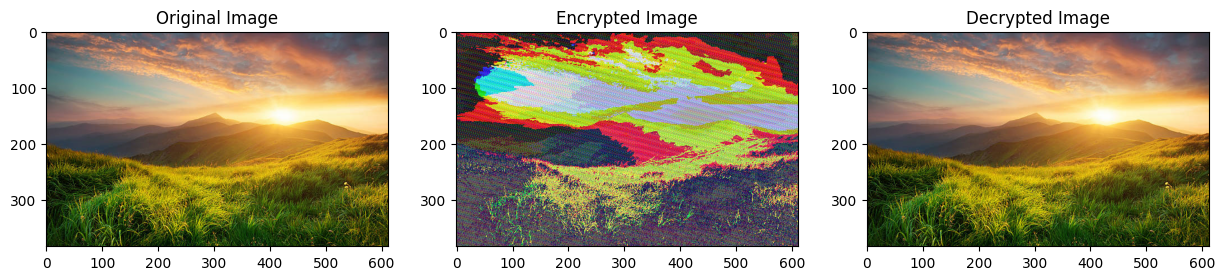

In [3]:
from cryptography.fernet import Fernet
from PIL import Image
import io
import matplotlib.pyplot as plt



def generate_key():
    return Fernet.generate_key()

def write_key_to_file(key, filename="secret.key"):
    with open(filename, "wb") as key_file:
        key_file.write(key)

def load_key(filename="secret.key"):
    return open(filename, "rb").read()

def xor_encrypt(data, key):
    encrypted_data = bytearray()
    for i in range(len(data)):
        encrypted_data.append(data[i] ^ key[i % len(key)])
    return bytes(encrypted_data)

def encrypt_image(image_path, key):
    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    encrypted_data = xor_encrypt(image_data, key)

    with open(image_path + ".enc", "wb") as encrypted_file:
        encrypted_file.write(encrypted_data)

def decrypt_image(encrypted_image_path, key,custom_key):
    with open(encrypted_image_path, "rb") as encrypted_file:
        encrypted_data = encrypted_file.read()
    if custom_key:
        key_to_use = custom_key.encode()
        print(key_to_use)
    else:
        key_to_use = key
        print(key_to_use)
    #decrypted_data = xor_encrypt(encrypted_data, key_to_use)

    # Open the decrypted image without using io.BytesIO
    #decrypted_image = Image.open(io.BytesIO(decrypted_data))
    try:
        with open(encrypted_image_path, "rb") as encrypted_file:
            encrypted_data = encrypted_file.read()

        if custom_key:
            key_to_use = custom_key.encode()
        else:
            key_to_use = key

        decrypted_data = xor_encrypt(encrypted_data, key_to_use)
        decrypted_image = Image.open(io.BytesIO(decrypted_data))
        return decrypted_image

    except Exception as e:
        print(f"Error decrypting image: {e}")
        return None
    
def key_strength(key):
    key_length_bits = len(key) * 8
    strength = 2 ** key_length_bits
    return strength

# Provide input image path
image_path = input("Enter the path of the image: ").strip()

# Check if a custom key is provided
custom_key = input("Enter custom key for testing: ").strip()


key = generate_key()
write_key_to_file(key)

    
# Load the key from the file
key = load_key()

# Encrypt the image
encrypt_image(image_path, key)

# Decrypt the image and get the decrypted image
decrypted_image = decrypt_image(image_path + ".enc", key,custom_key)
# Calculate and print the key strength

strength = key_strength(key)
print(f"Fernet key strength: {strength} possibilities")


# Check if decryption was successful
if decrypted_image:
    # Display the decrypted image
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(Image.open(image_path))
    axs[0].set_title("Original Image")
    
    encrypted_image = Image.frombytes(decrypted_image.mode, decrypted_image.size, xor_encrypt(decrypted_image.tobytes(), key))
    axs[1].imshow(encrypted_image)
    axs[1].set_title("Encrypted Image")

    # Display decrypted image
    axs[2].imshow(decrypted_image)
    axs[2].set_title("Decrypted Image")

    plt.show()
else:
    print("Decryption failed.")

plt.show()